In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/2022_02_08-02_30_31_AM.csv')

In [ ]:
df.head()

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
2,acbd66ff-79f8-467a-91f9-108a45af5626,$19.95,NaN,R3VtbWllcyB2aXRhbWlucyBhbmQgbWluZXJhbHMgZm9yIG...,SW1tdW5pdHkgZ3VtbWllcw,SGVhbHRo
3,963915d6-b2e3-4098-b242-9410593cf205,$92.00,NaN,U2VydW1z,RmFjZSBTZXJ1bQ,YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl
4,b5b68f3c-b1e0-40e5-8ee5-e2f7236c1daf,11.50,NaN,RWF0aW5nIFV0ZW5zaWxzL0N1dGxlcnk,Q2hvcHN0aWNrcw,a2l0Y2hpbmcgYW5kIGRpbmluZw


## Products without prices:

In [ ]:
df[df['price_string'].isnull()]

,uuid,price_string,price_string_unf,product_type,level_1,category
0,638744a4-b0ae-4166-8cb6-5c063c862036,NaN,NaN,TGFwdG9wIENvdmVycy9CYWdz,TGFwdG9wIENhc2U,RWxlY3Ryb25pY3M
1,ab313969-02cc-48b2-9daf-0054efb70b92,NaN,NaN,QmFraW5nIEN1cHMgYW5kIE1hdHM,QmFraW5nIE1hdHMgLyBCYWtpbmcgZGlzaA,a2l0Y2hpbmcgYW5kIGRpbmluZw
5,389d9f75-cc3f-4bd2-94f7-93e381a3bed5,NaN,NaN,TmF0dXJhbCBTd2VldGVuZXJzLyBTdWdhcg,TW9uayBGcnVpdA,Z3JvY2VyaWVz
13,1f2766ec-0a27-43f8-b28b-77a44492ead1,NaN,NaN,U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM,U2NydWJz,SG91c2Vob2xkIGFuZCBDbGVhbmluZw
16,7bad39f5-74b9-4611-afb9-46fb135190cd,NaN,NaN,UGx1cyBzaXplIHdlYXIgZHJlc3M,RHJlc3M,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
...,...,...,...,...,...,...
13729992,8d763911-79b7-402d-8964-6bfe89692c66,NaN,NaN,TWVucyB3b3Jrd2Vhci8gb2ZmaWNlIHdlYXI,U2hpcnRz,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729993,2dc182aa-d591-49e4-85d1-5c4a60a09664,NaN,NaN,U3BpY2Vz,UGVwcGVy,Z3JvY2VyaWVz
13729995,2a13338e-9268-4f7b-9e7c-b8c41c72971b,NaN,NaN,RHJlc3Nlcw,TWF4aSBkcmVzcw,Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz
13729997,679f073a-862a-4e43-b5ce-41e45afd3bfa,NaN,NaN,UGV0IEZvb2Q,RHJ5IERvZyBGb29k,cGV0IHN1cHBsaWVz


## Count of products without prices and with prices in each Product Type, Category, Level 1:


In [ ]:
df[df['price_string'].notnull()]['product_type'].value_counts()

U2NydWJzIGFuZCBjbGVhbmluZyBjbG90aHM        140000
d29tZW5zIE91dGVyd2Vhcg                     130000
Q29va2luZyBVdGVuc2lscw                     110000
V29tZW5zIFBhbnRz                            90000
WW9nYSBBY2Nlc3Nvcmllcy8gR2Vhcg              90000
                                            ...  
TWVjaGFuaWNhbCBQZW5jaWxz                    10000
UGV0IHBvb3AgYmFncyB3aXRoIGRpc3BlbnNlcnM     10000
UnVncw                                      10000
SnVtcHN1aXRzL092ZXJhbGw                     10000
QmFieSBTb2Fw                                10000
Name: product_type, Length: 209, dtype: int64

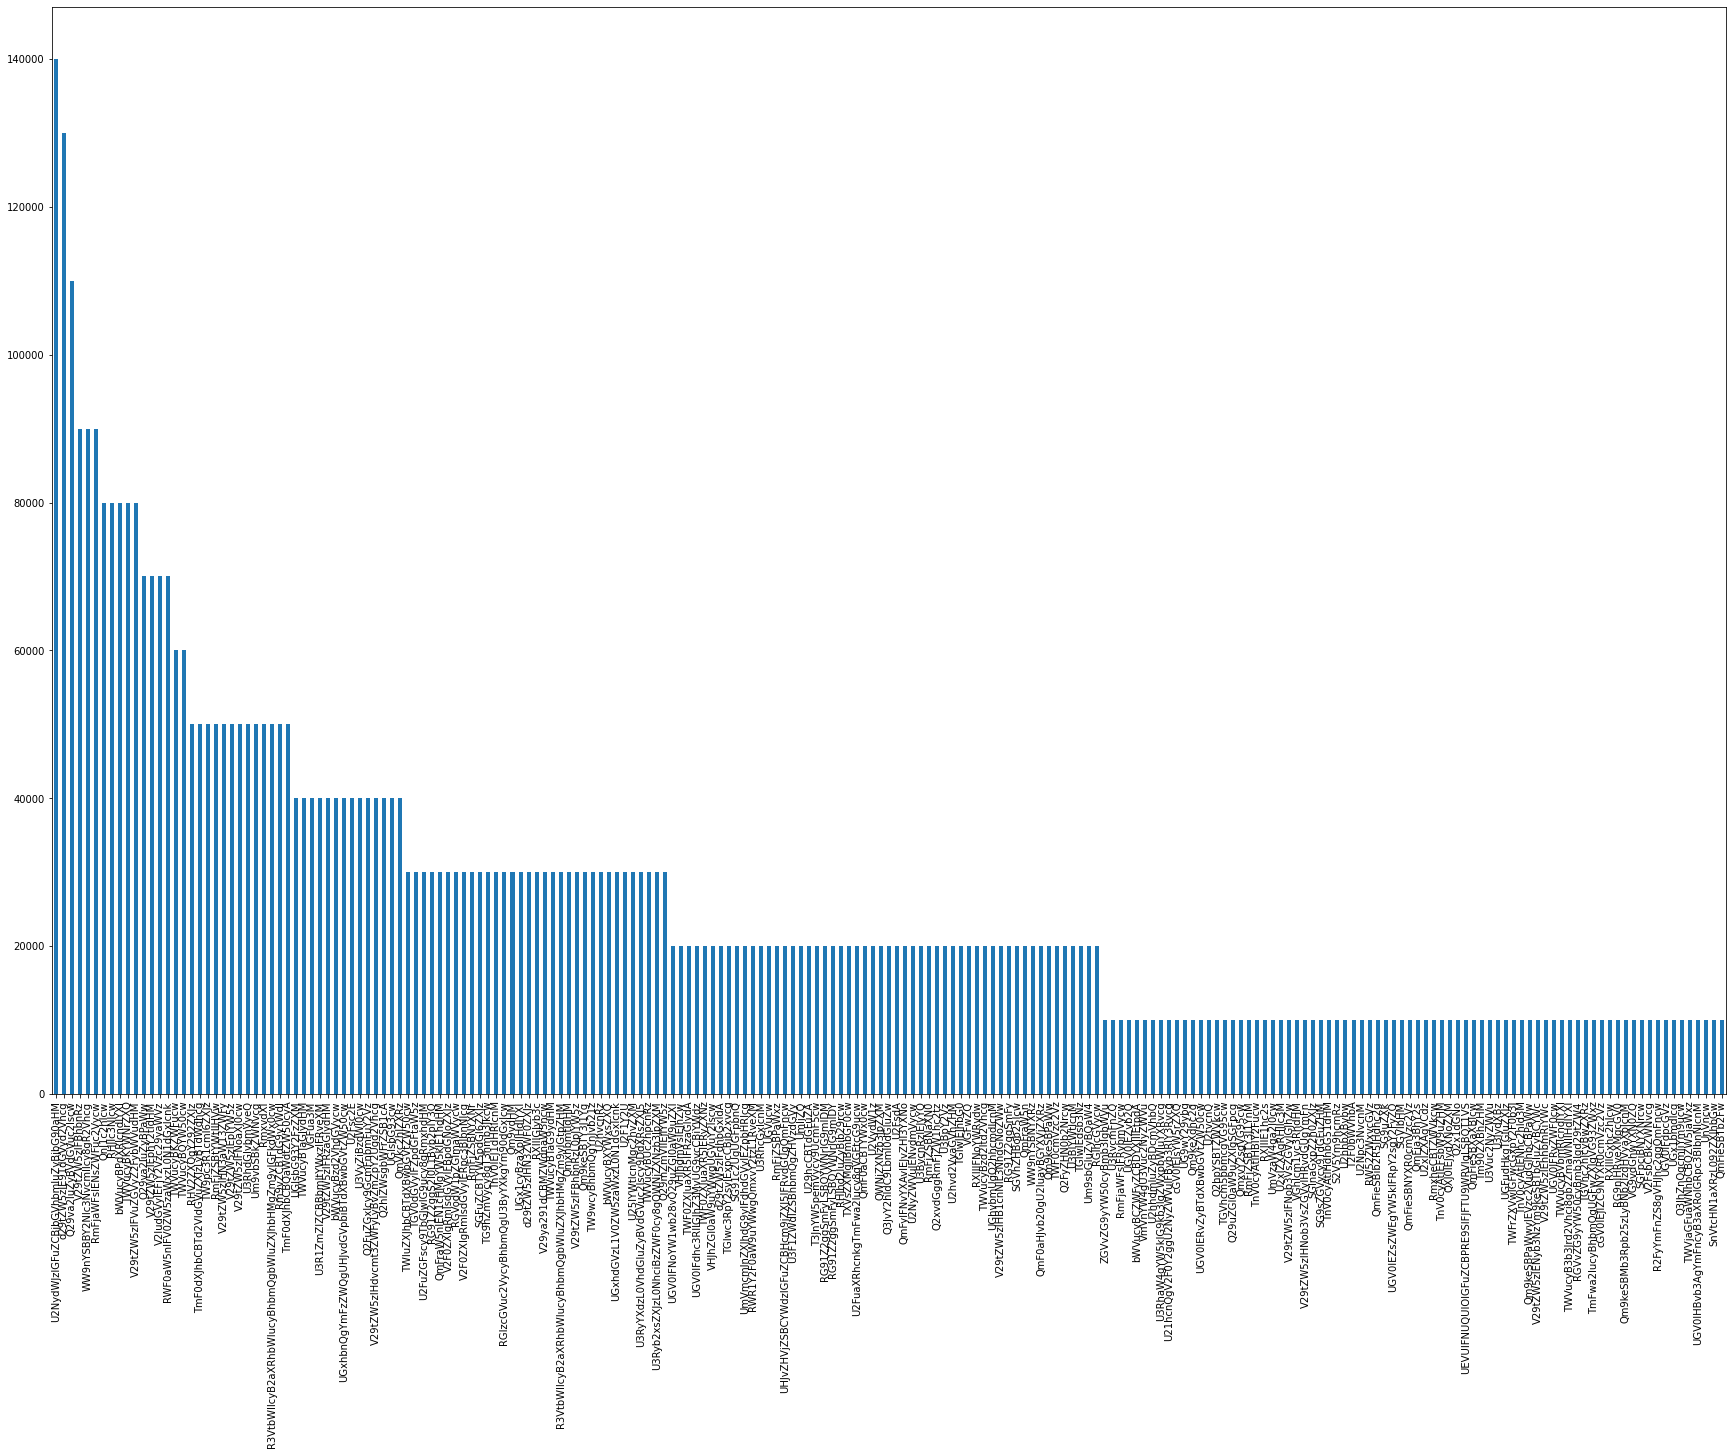

In [ ]:
plt.figure(figsize=(30,20))
df[df['price_string'].notnull()]['product_type'].value_counts().plot(kind='bar');

In [ ]:
df[df['price_string'].notnull()]['level_1'].value_counts()

U3Bvb24sIEtuaWZlIGFuZCBGb3Jr       60000
Q2xlYW5pbmcgY2xvdGg                50000
UHVmZmVyIEphY2tldA                 50000
TWVucyBTdHJhaWdodCBGaXQgamVhbnM    50000
U2NydWJz                           40000
                                   ...  
T25lIHBpZWNlIHN3aW1zdWl0           10000
RG9nIFdpcGVz                       10000
VHJhc2ggQmFncw                     10000
TWVucyBzbmVha2Vycw                 10000
UHVwcHkgU2hhbXBvbw                 10000
Name: level_1, Length: 366, dtype: int64

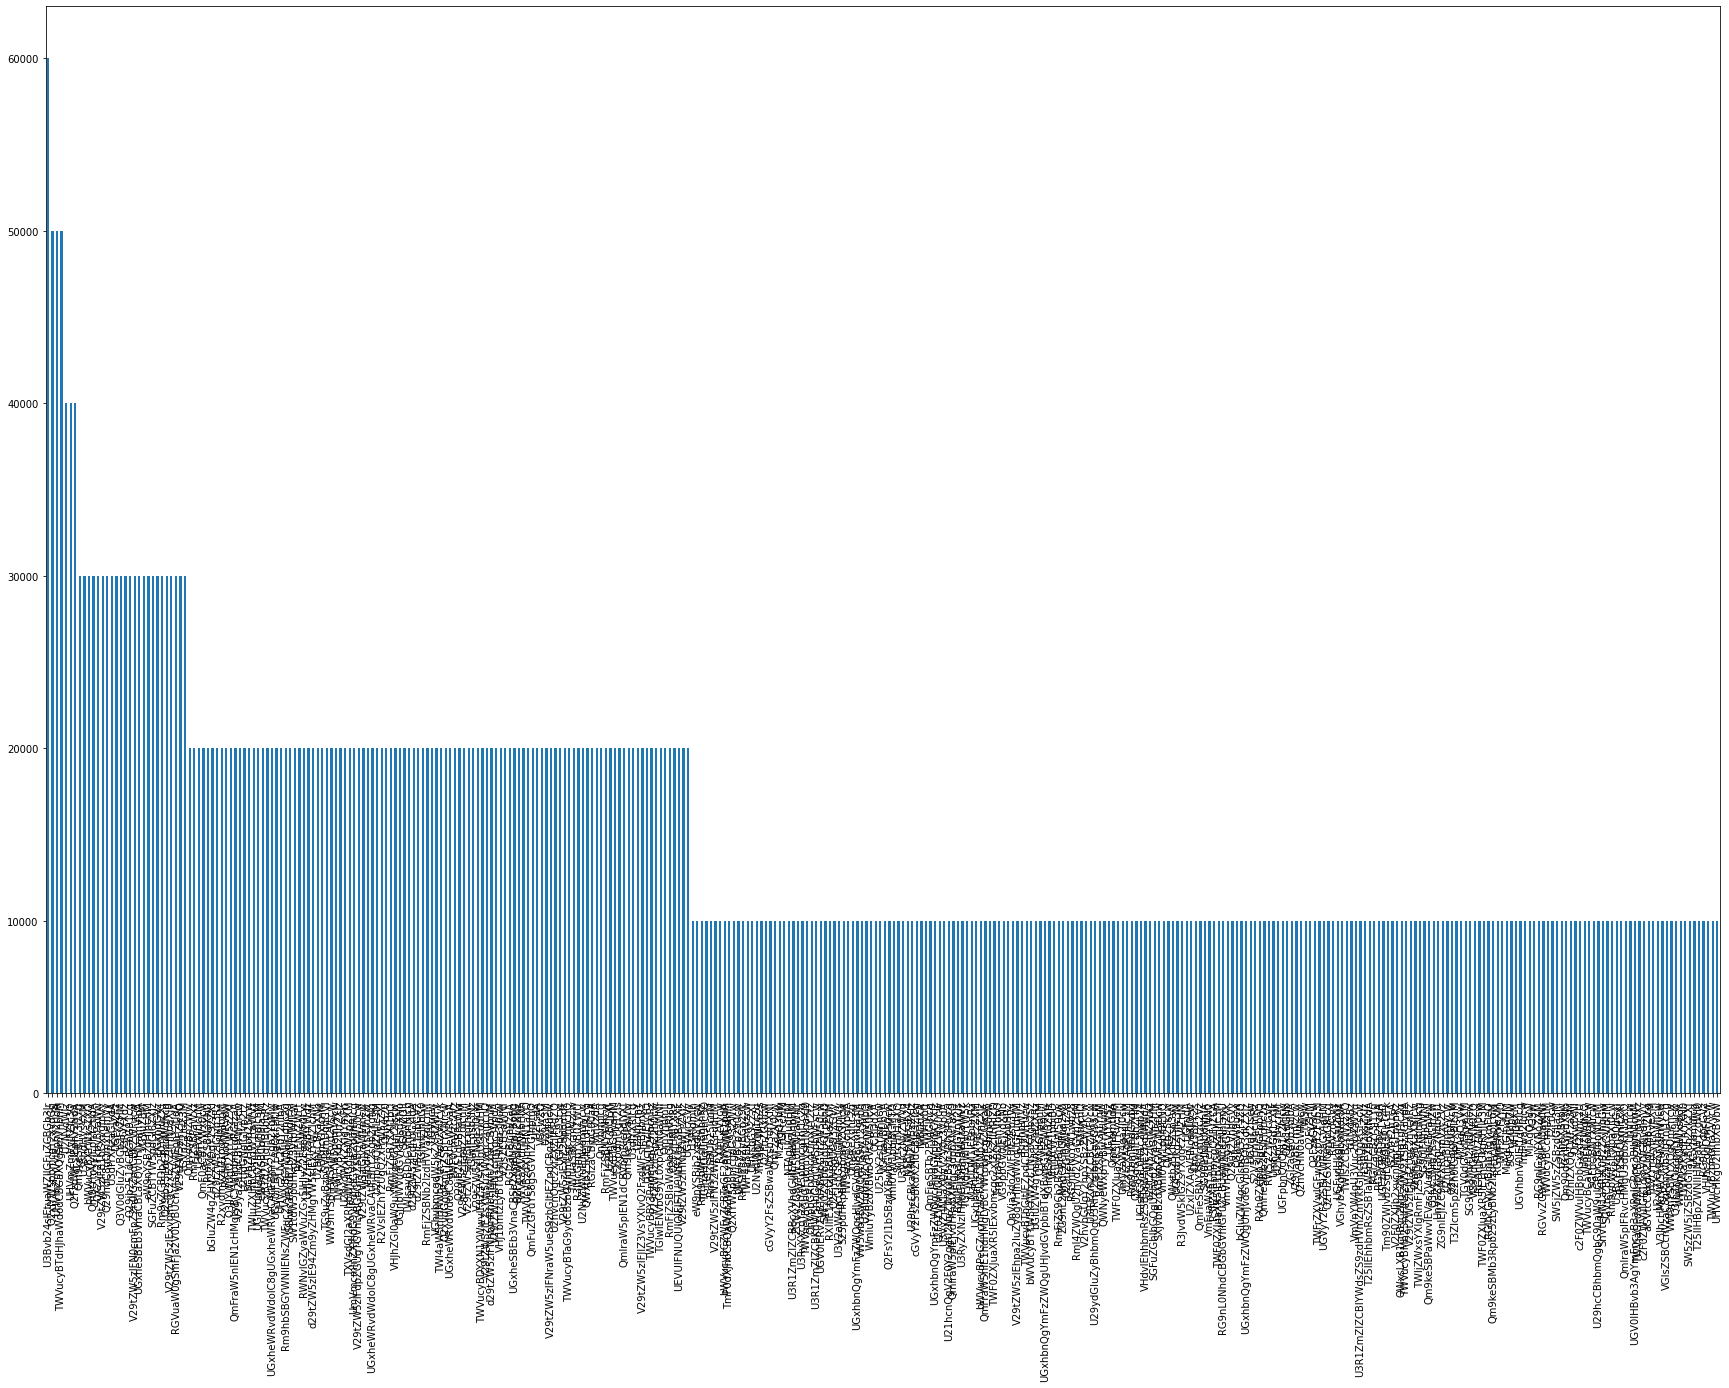

In [ ]:
plt.figure(figsize=(30,20))
df[df['price_string'].notnull()]['level_1'].value_counts().plot(kind='bar');

In [ ]:
df[df['price_string'].notnull()]['category'].value_counts()

Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz       1860000
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl        750000
SG91c2Vob2xkIGFuZCBDbGVhbmluZw          700000
Z3JvY2VyaWVz                            480000
a2l0Y2hpbmcgYW5kIGRpbmluZw              340000
SGVhbHRo                                290000
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ     200000
VG95cyBhbmQgR2FtZXM                     190000
QXJ0IHN1cHBsaWVz                        190000
cGV0IHN1cHBsaWVz                        160000
b2ZmaWNlIHByb2R1Y3Rz                    150000
RWxlY3Ryb25pY3M                         110000
QmFieWNhcmU                              90000
Name: category, dtype: int64

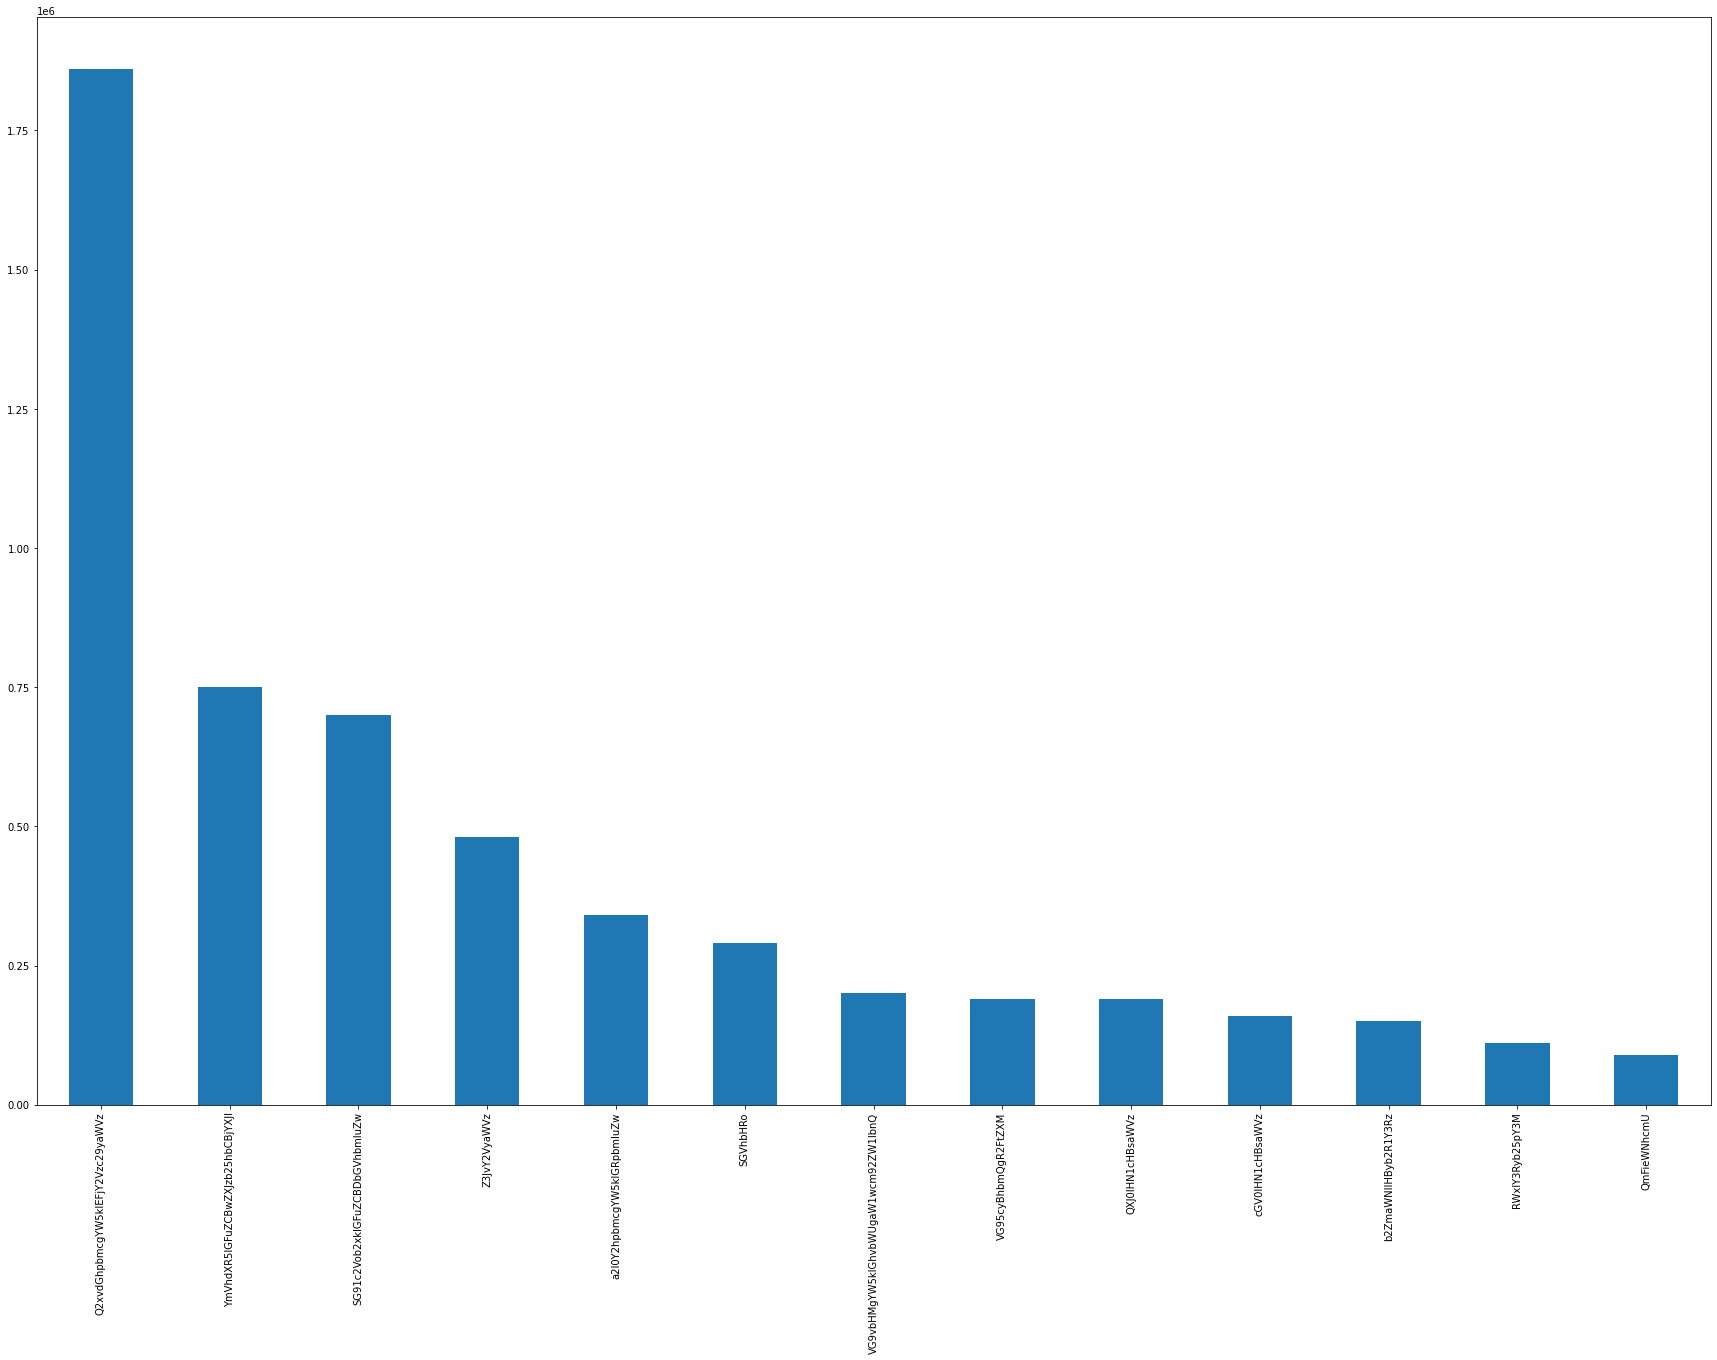

In [ ]:
plt.figure(figsize=(30,20))
df[df['price_string'].notnull()]['category'].value_counts().plot(kind='bar');

## Correct Product Prices in the correct format (eg: $56) wherever possible and separate them into currency and value columns:


In [ ]:
df['Price']=df[df['price_string'].notnull()]['price_string'].apply(lambda x : '$'+x if x[0]!='$' else x)

In [ ]:
df['Currency']=df[df['Price'].notnull()]['Price'].apply(lambda x : x[0])

In [ ]:
df['Value']=df[df['Price'].notnull()]['Price'].apply(lambda x : x.lstrip('$'))

In [ ]:
df['Value']=df['Value'].astype(float)

## List out the categories with average price of product:

In [ ]:
group=df[df['price_string'].notnull()].groupby('category')

In [ ]:
list_=list(df[df['price_string'].notnull()]['category'].unique())

In [ ]:
for i in range(len(list_)):
  print(list_[i],'=',group.get_group(list_[i])['Value'].mean())

SGVhbHRo = 32.557586206947526
YmVhdXR5IGFuZCBwZXJzb25hbCBjYXJl = 34.74506666663277
a2l0Y2hpbmcgYW5kIGRpbmluZw = 16.703235294171364
SG91c2Vob2xkIGFuZCBDbGVhbmluZw = 76.19900000017499
Q2xvdGhpbmcgYW5kIEFjY2Vzc29yaWVz = 125.41387096777159
VG95cyBhbmQgR2FtZXM = 32.44894736848918
QXJ0IHN1cHBsaWVz = 19.47105263160885
Z3JvY2VyaWVz = 10.541666666748569
VG9vbHMgYW5kIGhvbWUgaW1wcm92ZW1lbnQ = 82.22350000012855
b2ZmaWNlIHByb2R1Y3Rz = 20.48000000000243
QmFieWNhcmU = 163.6888888889052
cGV0IHN1cHBsaWVz = 14.181875000005006
RWxlY3Ryb25pY3M = 60.258181818227484
